# Análisis del Blog Authorship Corpus

<div style="text-align: right"> <b><i>Por: David Andrés Ayala Usma</i></b> </div>

## _Descripción del conjunto de datos_

El conjunto de datos Blog Authorship Corpus es una colección de entradas de blogs de 19.320 bloggers del portal **blogger.com**. Estas entradas de blog están fechadas hasta agosto de 2004.

Cada fila del conjunto de datos representa una entrada de blog y contiene siete campos: el ID del blogger, género, edad, signo astrológico, tema de discusión de la entrada, la fecha de publicación de la entrada y el texto de la entrada.

Existen tres grupos etarios grandes en el conjunto de datos: los bloggers de 13 a 17 años (8240), los de 23 a 27 años (8086) y los de 33 a 47 años (2994). Todos estos tres grupos están balanceados por género.

Los análisis realizados en este cuaderno se realizaron con una muestra aleatoria del 20% del conjunto de datos original, utilizando el siguiente código:

In [1]:
###No ejecutar
import pandas as pd
import random

#Muestreo del 20% de las líneas
original_file = 'Dataset/blogtext.csv.tar.gz' #Archivo no disponible por tamaño
p = 0.2
df = pd.read_csv(original_file, header=0, skiprows=lambda i: i>0 and random.random() > p)

#Escribir el conjunto de datos de trabajo
df.to_csv('Dataset/blogtext_sample_0.2.csv.gz', compression='gzip',encoding='utf-8')

## _Conjunto de datos y segmentación de los temas de blogging_

### Carga de datos

In [2]:
#Importar los módulos requeridos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Carga del conjunto de datos
data_file = 'Dataset/blogtext_sample_0.2.csv.gz'
dataset = pd.read_csv(data_file, compression='gzip', header = 0)
dataset.head(5)

,Unnamed: 0,blogtext.csv,gender,age,topic,sign,date,text
0,0,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
1,1,3581210,male,33,InvestmentBanking,Aquarius,"29,June,2004",urlLink The business class ta...
2,2,3581210,male,33,InvestmentBanking,Aquarius,"29,June,2004",I often wondered where the restau...
3,3,3581210,male,33,InvestmentBanking,Aquarius,"07,July,2004","A readers will know, shopping in ..."
4,4,3581210,male,33,InvestmentBanking,Aquarius,"14,July,2004",In any developing country (and I ...


### Segmentación de temas según la de edad

Un aspecto interesante del conjunto de datos es saber si existen temas que sean preferentemente discutidos en ciertas edades y no en otros, o si todos los grupos etarios tratan de manera relativamente equitativa estos temas.

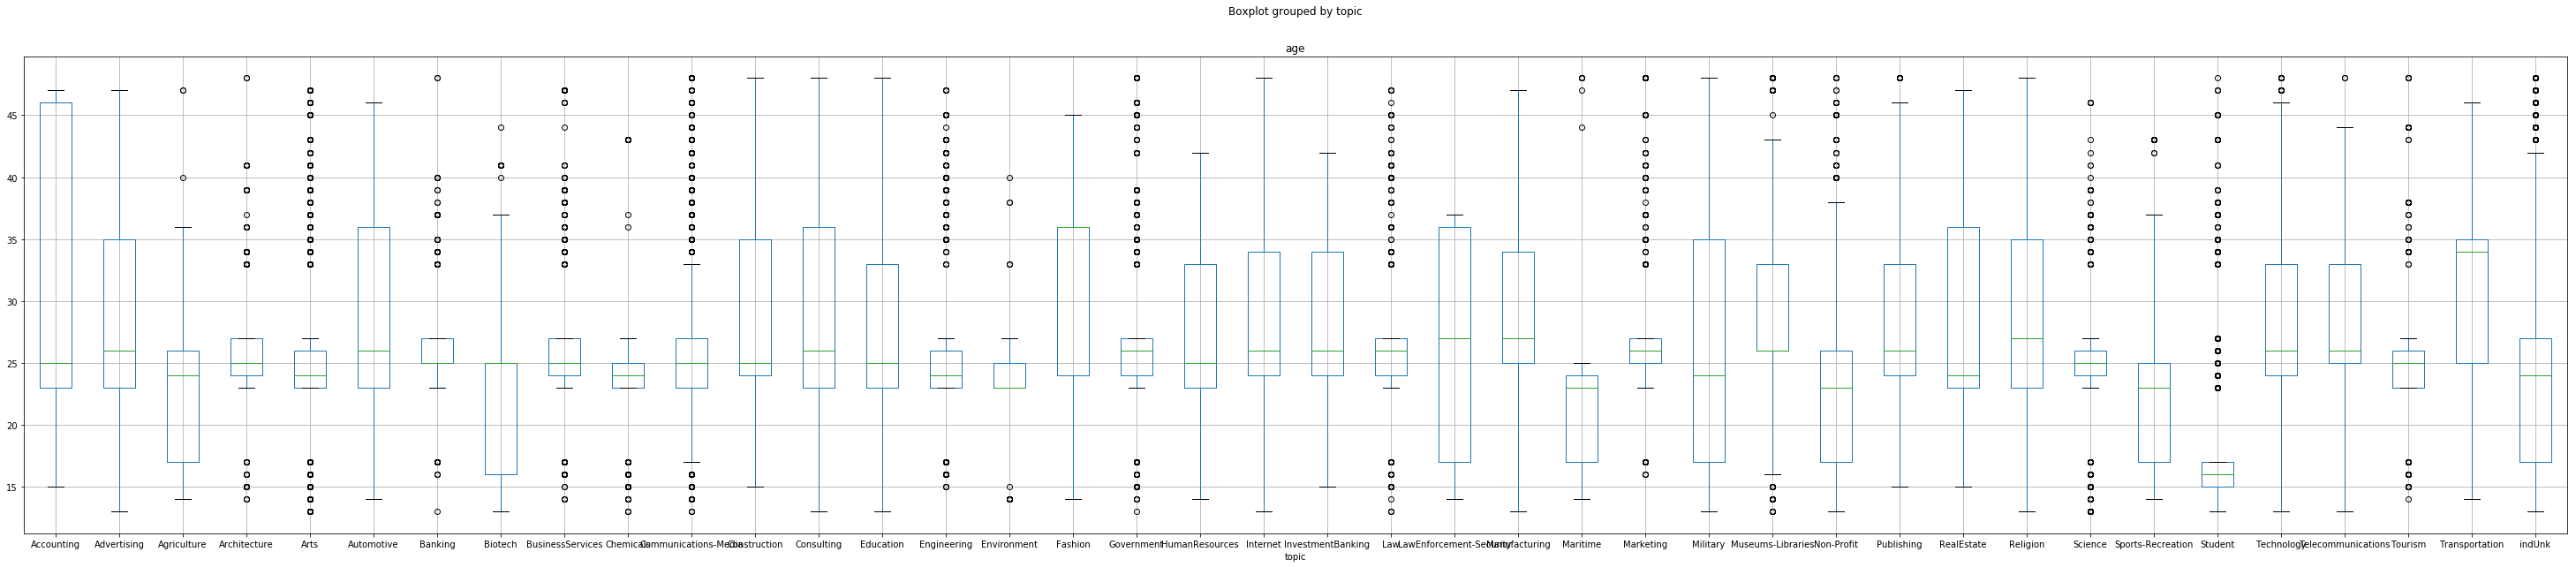

In [4]:
#Gráfica de la distribución de edades por cada tema en el conjunto de datos.
dataset.boxplot('age', by='topic', figsize=(50, 10))

Con el fin de verificar si hay soporte estadístico de los resultados observados, podemos hacer un análisis de varianza (ANOVA) para constatar los hallazgos.

In [5]:
#Importar módulos
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Ajuste del modelo de ANOVA
aov_model = ols('age ~ C(topic)', data=dataset).fit()
aov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     922.2
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:27:48   Log-Likelihood:            -4.5651e+05
No. Observations:              136105   AIC:                         9.131e+05
Df Residuals:                  136065   BIC:                         9.135e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              30.9613      0.249    124.443      0.000      30.474      31.449
C(topic)[T.Advertising]                -2.4815      0.336     -7.388      0.000      -3.140      -1.823
C(topic)[T.Agriculture]                -8.0998      0.519    -15.600      0.000      -9.117      -7.082
C(topic)[T.Architecture]               -4.7543      0.463    -10.261      0.000      -5.662      -3.846
C(topic)[T.Arts]                       -5.8589      0.263    -22.242      0.000      -6.375      -5.343
C(topic)[T.Automotive]                 -3.0243      0.513     -5.892      0.000      -4.030      -2.018
C(topic)[T.Banking]                    -4.7808      0.352    -13.565      0.000      -5.472      -4.090
C(topic)[T.Biotech]                    -8.2151      0.409    -20.110      0.000      -9.016      -7.414
C(topic)[T.BusinessServices]           -3.3792      0.335    -10.079      0.000      -4.036      -2.722
C(topic)[T.Chemicals]                  -8.5995      0.345    -24.949      0.000      -9.275      -7.924
C(topic)[T.Communications-Media]       -4.6084      0.272    -16.943      0.000      -5.142      -4.075
C(topic)[T.Construction]               -1.2946      0.533     -2.429      0.015      -2.339      -0.250
C(topic)[T.Consulting]                 -2.7517      0.318     -8.664      0.000      -3.374      -2.129
C(topic)[T.Education]                  -4.6655      0.265    -17.632      0.000      -5.184      -4.147
C(topic)[T.Engineering]                -5.9738      0.289    -20.692      0.000      -6.540      -5.408
C(topic)[T.Environment]                -7.5227      0.695    -10.827      0.000      -8.884      -6.161
C(topic)[T.Fashion]                    -0.6519      0.331     -1.968      0.049      -1.301      -0.003
C(topic)[T.Government]                 -3.7340      0.311    -12.005      0.000      -4.344      -3.124
C(topic)[T.HumanResources]             -4.7995      0.375    -12.814      0.000      -5.534      -4.065
C(topic)[T.Internet]                   -1.8757      0.277     -6.769      0.000      -2.419      -1.333
C(topic)[T.InvestmentBanking]          -2.8024      0.535     -5.240      0.000      -3.851      -1.754
C(topic)[T.Law]                        -4.3938      0.298    -14.764      0.000      -4.977      -3.810
C(topic)[T.LawEnforcement-Security]    -4.1220      0.429     -9.602      0.000      -4.963      -3.281
C(topic)[T.Manufacturing]              -2.2835      0.403     -5.669      0.000      -3.073      -1.494
C(topic)[T.Maritime]                   -7.5051      0.951     -7.896      0.000      -9.368      -5.642
C(topic)[T.Marketing]                  -3.5829      0.337    -10.644      0.000      -4.243      -2.923
C(topic)[T.Military]                   -5.1102      0.375    -13.63

#### _Resultados:_

En este análisis de visualización de los diferentes temas en el conjunto de datos, podemos observar que existen dos grandes tipos de temas: aquellos que tienen un amplio rango de edades y aquellos que están casi que restringidos a un rango particular.

Los temas de "Arquitectura", "Artes", "Ingeniería", "Medio Ambiente", "Banca", "Servicios para Negocios", "Químicos", "Gobierno", "Leyes", "Marketing", "Ciencia", "Turismo", "Deporte y recreación", "Marítimo", "Biotecnología" y "Sin ánimo de lucro" se encuentran concentrados, particularmente, en usuarios alrededor de los **20 a 25 años**. Las entradas sobre "Estudiantes" se concentran en el rango más bajo de edades, hacia los **15 años**. Por otro lado, los temas relativos a "Contabilidad", "Publicidad", "Automotores", "Construcción", "Consultoría", "Educación", "Moda", "Inversión bancaria", "Internet", "Seguridad", "Militar", "Religión", "Finca Raíz", "Publicaciones", "Transporte" y "Telecomunicaciones" se pueden encontrarse de manera relativamente más uniforme en los **diferentes rangos de edad**.

No se observó alguna tendencia especial entre el grupo etario de mayor edad, excepto en temas de contabilidad, donde tienen mayor cantidad de entradas.

### Segmentación de temas por género

Una pregunta interesante que se puede realizar en el conjunto de datos es si existen temas que preferentemente estén siendo abordados por género. Para ello, se puede realizar un análisis de una tabla de contingencia para estas dos variables y realizar una validación estadística de independencia de las variables mediante una prueba de Chi-cuadrado.

In [26]:
#Importar el módulo requerido para el análisis
from scipy import stats

contingency_table_gender = pd.crosstab(dataset.topic, dataset.gender)
contingency_table_gender

gender,female,male
topic,,
Accounting,673,102
Advertising,468,474
Agriculture,125,106
Architecture,159,155
Arts,3735,2671
Automotive,37,201
Banking,337,433
Biotech,175,282
BusinessServices,503,447


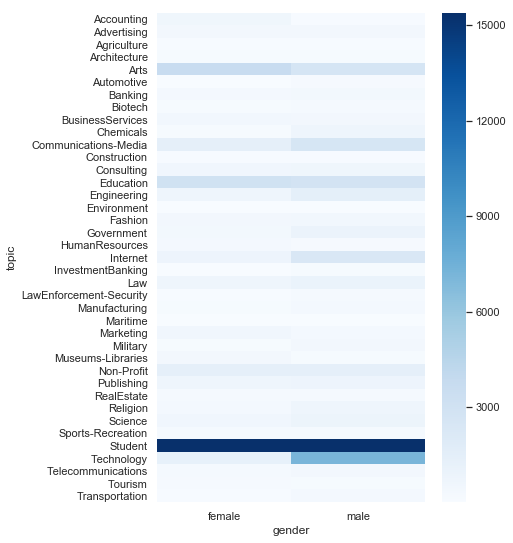

In [31]:
#Visualización de la tabla de contingencia por género
import seaborn as sns

sns.set(rc={'figure.figsize':(6,9)})
sns.heatmap(contingency_table_gender[:-1], cmap='Blues')

In [7]:
#Realizar la prueba estadística y obtención de los resultados
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_gender)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
9110.451601222041


===Degrees of Freedom===
39


===P-Value===
0.0


===Contingency Table===
[[  382.46923331   392.53076669]
 [  464.88518423   477.11481577]
 [  114.00050696   116.99949304]
 [  154.96172808   159.03827192]
 [ 3161.41665626  3244.58334374]
 [  117.45506778   120.54493222]
 [  380.00168987   389.99831013]
 [  225.53347048   231.46652952]
 [  468.83325374   481.16674626]
 [  416.02782411   426.97217589]
 [ 1959.22949194  2010.77050806]
 [  106.59787664   109.40212336]
 [  607.50919511   623.49080489]
 [ 2918.116873    2994.883127  ]
 [ 1103.97893538  1133.02106462]
 [   56.25999045    57.74000955]
 [  494.49570552   507.50429448]
 [  679.56146358   697.43853642]
 [  302.02731714   309.97268286]
 [ 1590.57850189  1632.42149811]
 [  105.61085926   108.38914074]
 [  887.82212997   911.17787003]
 [  193.45540575   198.54459425]
 [  235.89715293   242.10284707]
 [   28.12999522    28.87000478]
 [  460.44360604   472.55639396]
 [  301.53380846   309.46619154]

#### _Resultados:_

### Segmentación de temas por signo zodiacal

Con el mismo método de análisis también se puede interrogar el conjunto de datos por si existe alguna asociación estadística entre el signo zodiacal y el tema tratado en la entrada de blog.

In [8]:
#Importar el módulo requerido para el análisis
from scipy import stats

contingency_table_sign = pd.crosstab(dataset.topic, dataset.sign)
contingency_table_sign

sign,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
topic,,,,,,,,,,,,
Accounting,98,4,76,6,29,13,21,86,227,35,85,95
Advertising,164,117,126,27,81,38,37,26,95,32,150,49
Agriculture,9,8,7,40,4,6,18,55,19,22,41,2
Architecture,11,26,26,24,22,12,36,12,52,38,13,42
Arts,470,271,346,531,491,283,988,387,664,734,672,569
Automotive,9,7,51,2,21,67,0,14,14,1,3,49
Banking,49,62,207,12,39,33,24,57,98,14,148,27
Biotech,51,28,71,40,11,14,94,60,4,10,58,16
BusinessServices,47,88,78,26,56,271,86,75,39,48,16,120


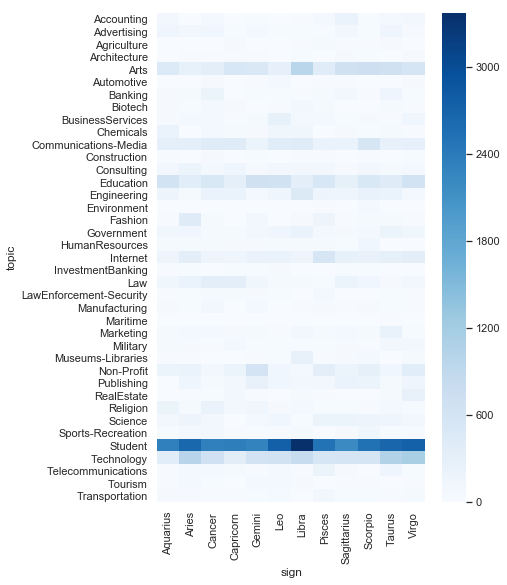

In [32]:
#Visualización de la tabla de contingencia por signo
import seaborn as sns

sns.set(rc={'figure.figsize':(6,9)})
sns.heatmap(contingency_table_sign[:-1], cmap='Blues')

In [9]:
#Realizar la prueba estadística y obtención de los resultados
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_sign)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
19052.91833336318


===Degrees of Freedom===
429


===P-Value===
0.0


===Contingency Table===
[[5.69698027e+01 7.46728629e+01 7.37561074e+01 5.55861284e+01
  5.87634547e+01 6.07108482e+01 7.04193454e+01 6.24760295e+01
  5.70210499e+01 6.52946255e+01 7.14215128e+01 6.79082326e+01]
 [6.92458763e+01 9.07636604e+01 8.96493590e+01 6.75640425e+01
  7.14260314e+01 7.37930568e+01 8.55935785e+01 7.59386062e+01
  6.93081665e+01 7.93645641e+01 8.68116969e+01 8.25413614e+01]
 [1.69806767e+01 2.22573307e+01 2.19840785e+01 1.65682525e+01
  1.75153007e+01 1.80957496e+01 2.09895081e+01 1.86218875e+01
  1.69959517e+01 1.94620109e+01 2.12882187e+01 2.02410345e+01]
 [2.30819588e+01 3.02545535e+01 2.98831197e+01 2.25213475e+01
  2.38086771e+01 2.45976856e+01 2.85311928e+01 2.53128687e+01
  2.31027222e+01 2.64548547e+01 2.89372323e+01 2.75137871e+01]
 [4.70901363e+02 6.17231432e+02 6.09653709e+02 4.59464178e+02
  4.85727343e+02 5.01824121e+02 5.82072679e+02 5.16414768e+02
  4.71324962e+02 

#### _Resultados:_

## _Entidades más nombradas en el corpus de datos de blogs_

Con el objetivo de conocer qué entidades y de qué tipo, tales como personas, organizaciones, sitios u otros, se mencionan frecuentemente en el conjunto de datos, podemos utilizar un análisis de _**Name Entity Recognition**_ para extraer esta información a partir del texto de los blogs.

Para este análisis utilizaremos el paquete SpaCy de Python para procesamiento de texto natural:

In [97]:
#Importar módulos
import spacy
from spacy import displacy
from collections import Counter


#Importar y aplicar modelos de procesamiento de texto natural en idioma inglés de SpaCy
import en_core_web_sm
nlp = en_core_web_sm.load()

#Añadir algunas "stopwords" para evitar que NLP los reconozca como términos
customize_stop_words = ['Here','Ah', 'Well', 'Yeah', 'Anyways', 'urlLink', 'Ok']
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

Para recuperar las entidades reconocidas por el modelo de lenguaje y calcular las frecuencias de cada una, creamos un arreglo que contendrá las entidades identificadas en todo el conjunto de datos y realizamos un reconocimiento de entidades por cada entrada:

In [98]:
#Arreglo de entidades
entities = []

#Reconocimiento de entidades por cada entrada y almacenar únicamente aquellas referentes a personas (PERSON),
#lugares (LOC o GPE) o productos (PRODUCT).
for index, row in dataset.iterrows():
    row_processing = nlp(str(row["text"]))
    entities += [(entity.text, entity.label_) for entity in row_processing.ents if entity.label_ == "PERSON" or entity.label_ == "LOC" or entity.label_ == "GPE" or entity.label_ == "PRODUCT" ]

MemoryError: 

In [103]:
Counter(entities).most_common()

[(('           ', 'GPE'), 6415),
 (('        ', 'PERSON'), 2419),
 (('         ', 'GPE'), 1171),
 (('Bush', 'PERSON'), 778),
 (('                 ', 'GPE'), 769),
 (('     ', 'GPE'), 613),
 ((' ', 'PERSON'), 601),
 (('U.S.', 'GPE'), 573),
 (('America', 'GPE'), 565),
 (('US', 'GPE'), 532),
 (('               ', 'GPE'), 516),
 (('Iraq', 'GPE'), 508),
 (('Jesus', 'PERSON'), 493),
 (('      ', 'GPE'), 460),
 (('SBristowSD6', 'PERSON'), 427),
 (('Haha', 'PERSON'), 361),
 (('     ', 'PERSON'), 358),
 (('Diva', 'PERSON'), 353),
 (('Chicago', 'GPE'), 340),
 (('Matt', 'PERSON'), 339),
 (('New York', 'GPE'), 307),
 (('God', 'PERSON'), 302),
 (('California', 'GPE'), 282),
 (('        ', 'GPE'), 279),
 (('Japan', 'GPE'), 268),
 (('         ', 'PERSON'), 266),
 (('John', 'PERSON'), 254),
 (('Ben', 'PERSON'), 254),
 (('Adam', 'PERSON'), 252),
 (('Josh', 'PERSON'), 248),
 (('Michael', 'PERSON'), 247),
 (('Ryan', 'PERSON'), 242),
 (('Canada', 'GPE'), 230),
 (('London', 'GPE'), 228),
 (('Mike', 'PERSON

#### _Resultados_

## _Topic modeling para la comparación de temas en el conjunto de datos_